# On-Balance Volume (OBV) Indicator Visualization

**OBV Formula:**
- If close > previous close: OBV = OBV_previous + volume (Buying pressure)
- If close < previous close: OBV = OBV_previous - volume (Selling pressure)
- If close == previous close: OBV = OBV_previous (No net change)

**Interpretation:**
- **Trend Confirmation**: Rising OBV + Rising Price = Strong uptrend (bullish)
- **Trend Confirmation**: Falling OBV + Falling Price = Strong downtrend (bearish)
- **Divergence**: Rising Price + Falling OBV = Weak uptrend, potential reversal (bearish signal)
- **Divergence**: Falling Price + Rising OBV = Weak downtrend, potential reversal (bullish signal)
- **Accumulation**: Rising OBV during consolidation = Smart money buying (bullish signal)
- **Distribution**: Falling OBV during consolidation = Smart money selling (bearish signal)

**Key Signals:**
1. **Trend Confirmation**: Volume precedes price - OBV should move WITH price
2. **Divergence**: OBV diverges from price = Early warning of potential reversal
3. **Breakout Signal**: OBV breaks out BEFORE price = Smart money accumulating
4. **Accumulation/Distribution**: OBV during consolidation indicates intent of smart money

**Theory:**
- Volume is the "fuel" for price moves
- Smart money accumulates before price rises (rising OBV before price)
- Rising OBV with rising price confirms uptrend is healthy
- Falling OBV while price rises signals weak trend (distribution in progress)

In [1]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from indikator import obv

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
np.random.seed(42)

## Scenario 1: OBV Confirming Price Uptrend
Both price and OBV rising together = Healthy uptrend with strong volume confirmation

/tmp/sselcuk/ipykernel_1244355/3137034572.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


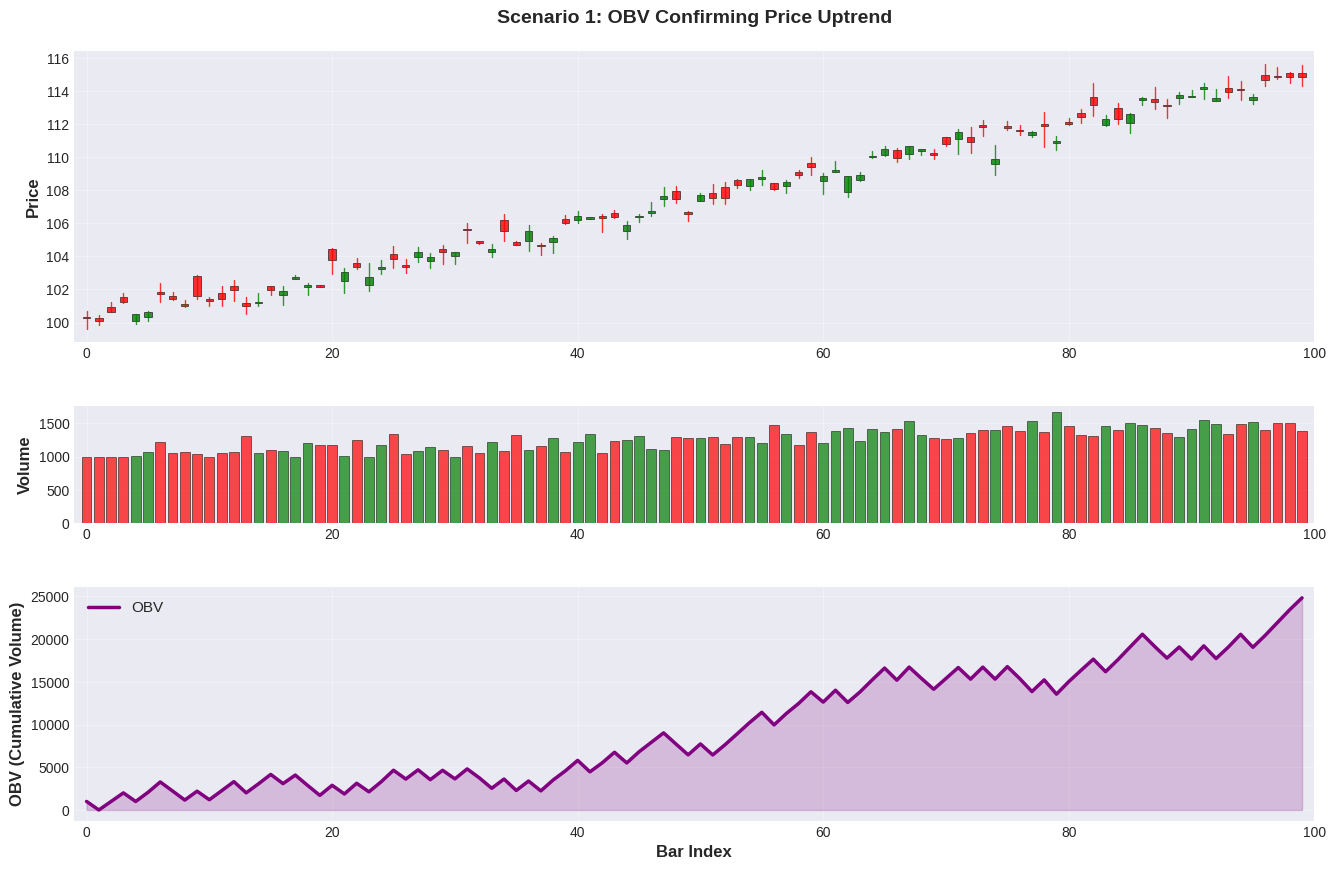

Uptrend Confirmation Analysis:
  Price: 100.25 -> 114.88 (Up 14.63)
  OBV:   1000 -> 24839 (Up 23839)
  Avg Volume: 1257
  Volume trend: 1000 -> 1386

  Both price and OBV rising = STRONG BULLISH CONFIRMATION!
  Volume increasing = Smart money accumulating


In [2]:
# Create uptrending price with increasing volume
n = 100
dates = pd.date_range('2024-01-01 09:30', periods=n, freq='5min')

# Price trend: steady uptrend
trend = np.linspace(100, 115, n)
noise = np.random.randn(n) * 0.5
closes = trend + noise

# Volume increases during uptrend (strong buying pressure)
base_volume = 1000
volume_trend = np.linspace(base_volume, base_volume * 1.5, n)
volume_noise = np.random.randn(n) * 100
volumes = np.maximum(base_volume, volume_trend + volume_noise)  # Ensure positive

# Create OHLC
opens = closes + np.random.randn(n) * 0.3
highs = np.maximum(opens, closes) + np.abs(np.random.randn(n)) * 0.4
lows = np.minimum(opens, closes) - np.abs(np.random.randn(n)) * 0.4

df1 = pd.DataFrame({'open': opens, 'high': highs, 'low': lows, 'close': closes, 'volume': volumes}, index=dates)
result1 = obv(df1)

# Plot
fig = plt.figure(figsize=(16, 10))
gs = GridSpec(3, 1, height_ratios=[2.5, 1, 2], hspace=0.3)

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax3 = fig.add_subplot(gs[2], sharex=ax1)

# Candlesticks
for i in range(len(df1)):
    color = 'green' if df1['close'].iloc[i] >= df1['open'].iloc[i] else 'red'
    ax1.plot([i, i], [df1['low'].iloc[i], df1['high'].iloc[i]], color=color, linewidth=1, alpha=0.8)
    height = abs(df1['close'].iloc[i] - df1['open'].iloc[i])
    if height < 0.05: height = 0.12
    bottom = min(df1['open'].iloc[i], df1['close'].iloc[i])
    ax1.add_patch(plt.Rectangle((i-0.3, bottom), 0.6, height, facecolor=color, edgecolor='black', linewidth=0.5, alpha=0.8))

ax1.set_ylabel('Price', fontsize=12, fontweight='bold')
ax1.set_title('Scenario 1: OBV Confirming Price Uptrend', fontsize=14, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-1, len(df1))

# Volume
colors_vol = ['green' if df1['close'].iloc[i] >= df1['open'].iloc[i] else 'red' for i in range(len(df1))]
ax2.bar(range(len(df1)), df1['volume'], color=colors_vol, alpha=0.7, edgecolor='black', linewidth=0.5)
ax2.set_ylabel('Volume', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-1, len(df1))

# OBV - use integer indices for plotting
obv_vals = result1['obv'].values
ax3.plot(range(len(obv_vals)), obv_vals, 'purple', linewidth=2.5, label='OBV')
ax3.fill_between(range(len(df1)), 0, obv_vals, alpha=0.2, color='purple')
ax3.set_xlabel('Bar Index', fontsize=12, fontweight='bold')
ax3.set_ylabel('OBV (Cumulative Volume)', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend(loc='upper left', fontsize=11)
ax3.set_xlim(-1, len(df1))

plt.tight_layout()
plt.show()

print('Uptrend Confirmation Analysis:')
print(f'  Price: {df1["close"].iloc[0]:.2f} -> {df1["close"].iloc[-1]:.2f} (Up {(df1["close"].iloc[-1] - df1["close"].iloc[0]):.2f})')
print(f'  OBV:   {result1["obv"].iloc[0]:.0f} -> {result1["obv"].iloc[-1]:.0f} (Up {(result1["obv"].iloc[-1] - result1["obv"].iloc[0]):.0f})')
print(f'  Avg Volume: {df1["volume"].mean():.0f}')
print(f'  Volume trend: {df1["volume"].iloc[0]:.0f} -> {df1["volume"].iloc[-1]:.0f}')
print('\n  Both price and OBV rising = STRONG BULLISH CONFIRMATION!')
print('  Volume increasing = Smart money accumulating')

## Scenario 2: Bearish Divergence (Price Rising, OBV Falling)
Price making new highs but OBV falling = Weak uptrend, potential reversal warning

/tmp/sselcuk/ipykernel_1244355/64691484.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


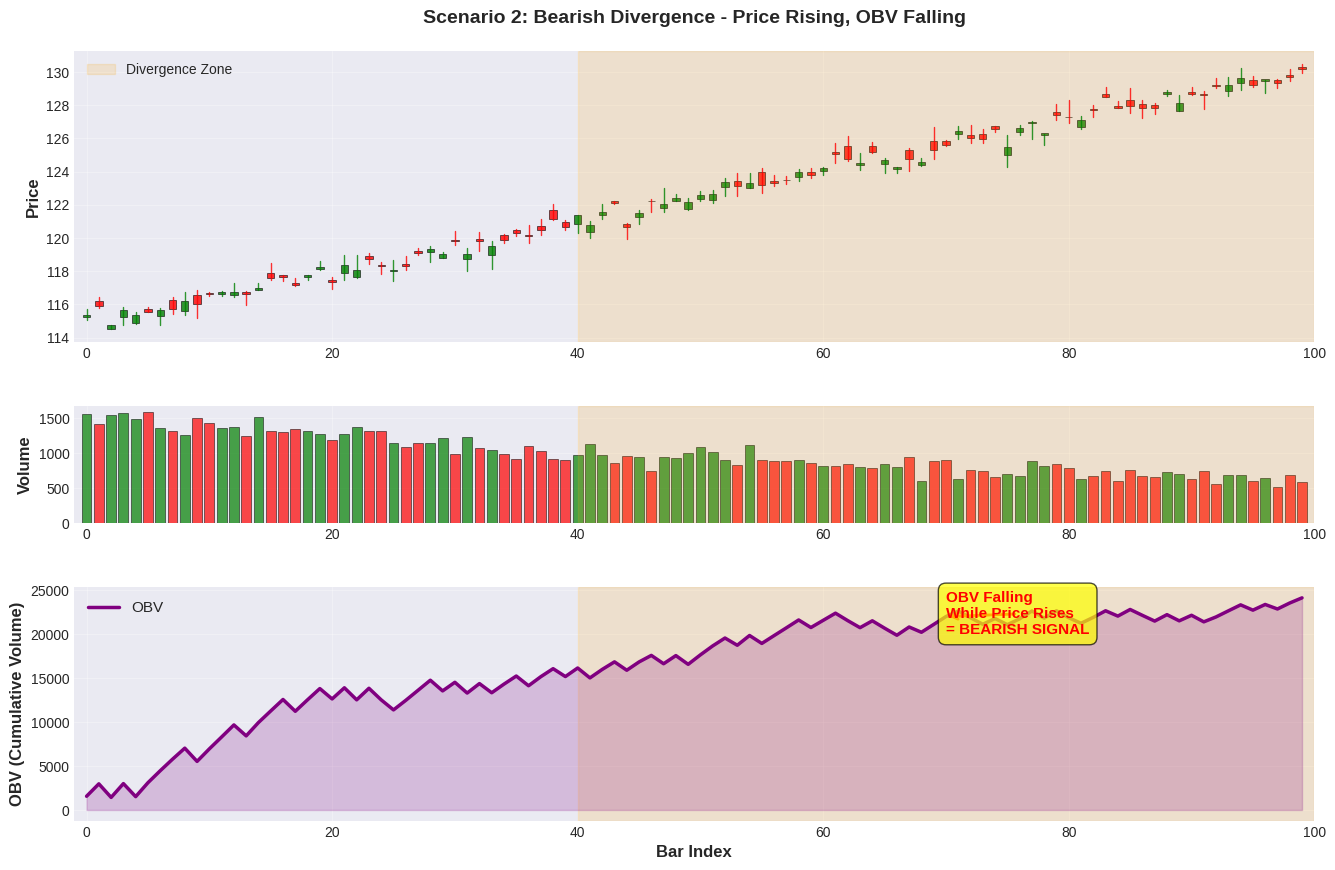

Bearish Divergence Analysis:
  Price (bars 0-50):   115.37 -> 122.61 (Up 7.24)
  Price (bars 50-100): 122.61 -> 130.15 (Up 7.54)

  OBV (bars 0-50):     1561 -> 17648 (Up 16088)
  OBV (bars 50-100):   17648 -> 24130 (Down -6482)

  Avg Volume (0-50):   1196
  Avg Volume (50-100): 767

  BEARISH DIVERGENCE: Price making new highs with FALLING OBV
  Expect potential REVERSAL when OBV breaks down


In [3]:
# Create price making new highs while OBV falls (divergence)
n2 = 100
dates2 = pd.date_range('2024-01-02 09:30', periods=n2, freq='5min')

# Price trend: continues rising
trend2 = np.linspace(115, 130, n2)
noise2 = np.random.randn(n2) * 0.4
closes2 = trend2 + noise2

# Volume trend: DECREASING (smart money exiting)
# Early high volume, then declining
volume_phase1 = np.linspace(1500, 1000, 40)
volume_phase2 = np.linspace(1000, 600, 60)
volumes2 = np.concatenate([volume_phase1, volume_phase2])
volumes2 = np.maximum(400, volumes2 + np.random.randn(n2) * 80)  # Add noise

# Create OHLC
opens2 = closes2 + np.random.randn(n2) * 0.3
highs2 = np.maximum(opens2, closes2) + np.abs(np.random.randn(n2)) * 0.4
lows2 = np.minimum(opens2, closes2) - np.abs(np.random.randn(n2)) * 0.4

df2 = pd.DataFrame({'open': opens2, 'high': highs2, 'low': lows2, 'close': closes2, 'volume': volumes2}, index=dates2)
result2 = obv(df2)

# Plot
fig = plt.figure(figsize=(16, 10))
gs = GridSpec(3, 1, height_ratios=[2.5, 1, 2], hspace=0.3)

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax3 = fig.add_subplot(gs[2], sharex=ax1)

# Candlesticks
for i in range(len(df2)):
    color = 'green' if df2['close'].iloc[i] >= df2['open'].iloc[i] else 'red'
    ax1.plot([i, i], [df2['low'].iloc[i], df2['high'].iloc[i]], color=color, linewidth=1, alpha=0.8)
    height = abs(df2['close'].iloc[i] - df2['open'].iloc[i])
    if height < 0.05: height = 0.12
    bottom = min(df2['open'].iloc[i], df2['close'].iloc[i])
    ax1.add_patch(plt.Rectangle((i-0.3, bottom), 0.6, height, facecolor=color, edgecolor='black', linewidth=0.5, alpha=0.8))

# Highlight divergence zone
ax1.axvspan(40, 100, alpha=0.15, color='orange', label='Divergence Zone')
ax1.set_ylabel('Price', fontsize=12, fontweight='bold')
ax1.set_title('Scenario 2: Bearish Divergence - Price Rising, OBV Falling', fontsize=14, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left')
ax1.set_xlim(-1, len(df2))

# Volume - decreasing
colors_vol2 = ['green' if df2['close'].iloc[i] >= df2['open'].iloc[i] else 'red' for i in range(len(df2))]
ax2.bar(range(len(df2)), df2['volume'], color=colors_vol2, alpha=0.7, edgecolor='black', linewidth=0.5)
ax2.axvspan(40, 100, alpha=0.15, color='orange')
ax2.set_ylabel('Volume', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-1, len(df2))

# OBV - use integer indices for plotting
obv_vals2 = result2['obv'].values
ax3.plot(range(len(obv_vals2)), obv_vals2, 'purple', linewidth=2.5, label='OBV')
ax3.axvspan(40, 100, alpha=0.15, color='orange')

# Mark divergence
ax3.annotate('OBV Falling\nWhile Price Rises\n= BEARISH SIGNAL', 
             xy=(70, obv_vals2[70]), xytext=(70, obv_vals2[70] - 2000),
             fontsize=11, fontweight='bold', color='red',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
             arrowprops=dict(arrowstyle='->', color='red', lw=2))

ax3.fill_between(range(len(df2)), 0, obv_vals2, alpha=0.2, color='purple')
ax3.set_xlabel('Bar Index', fontsize=12, fontweight='bold')
ax3.set_ylabel('OBV (Cumulative Volume)', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend(loc='upper left', fontsize=11)
ax3.set_xlim(-1, len(df2))

plt.tight_layout()
plt.show()

print('Bearish Divergence Analysis:')
print(f'  Price (bars 0-50):   {df2["close"].iloc[0]:.2f} -> {df2["close"].iloc[50]:.2f} (Up {(df2["close"].iloc[50] - df2["close"].iloc[0]):.2f})')
print(f'  Price (bars 50-100): {df2["close"].iloc[50]:.2f} -> {df2["close"].iloc[-1]:.2f} (Up {(df2["close"].iloc[-1] - df2["close"].iloc[50]):.2f})')
print(f'\n  OBV (bars 0-50):     {result2["obv"].iloc[0]:.0f} -> {result2["obv"].iloc[50]:.0f} (Up {(result2["obv"].iloc[50] - result2["obv"].iloc[0]):.0f})')
print(f'  OBV (bars 50-100):   {result2["obv"].iloc[50]:.0f} -> {result2["obv"].iloc[-1]:.0f} (Down {(result2["obv"].iloc[50] - result2["obv"].iloc[-1]):.0f})')
print(f'\n  Avg Volume (0-50):   {df2["volume"].iloc[0:50].mean():.0f}')
print(f'  Avg Volume (50-100): {df2["volume"].iloc[50:100].mean():.0f}')
print('\n  BEARISH DIVERGENCE: Price making new highs with FALLING OBV')
print('  WARNING: Weak uptrend - smart money is EXITING')
print('  Expect potential REVERSAL when OBV breaks down')

## Scenario 3: Comparing OBV with Price Movement
Visual comparison of how OBV and price move together in different market conditions

/tmp/sselcuk/ipykernel_1244355/4024953038.py:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


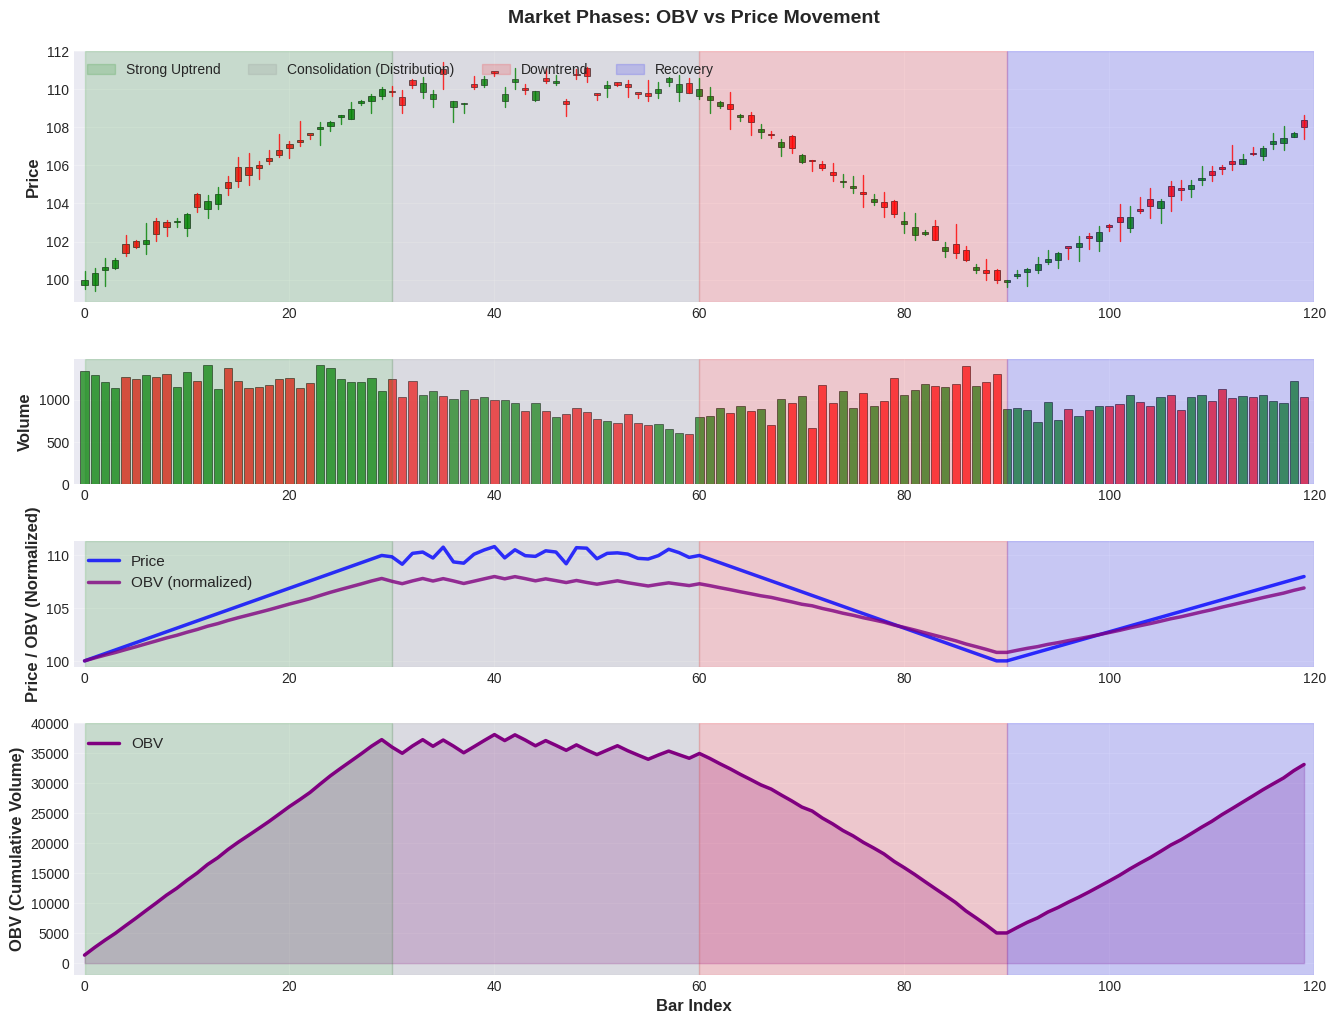

Phase Analysis:

Phase 1: Strong Uptrend (0-30)
  Price: 100.00 -> 109.87 (Up 9.87)
  OBV:   1340 -> 36027 (Up 34687)
  Avg Volume: 1242
  Status: BULLISH CONFIRMATION (both rising)

Phase 2: Consolidation with Declining Volume (30-60)
  Price: 109.87 -> 110.00 (Change 0.13)
  OBV:   36027 -> 34955 (Change -1072)
  Avg Volume: 897
  Status: DISTRIBUTION (volume declining = smart money exiting)

Phase 3: Downtrend (60-90)
  Price: 110.00 -> 100.00 (Down 10.00)
  OBV:   34955 -> 5034 (Down 29921)
  Avg Volume: 1024
  Status: BEARISH CONFIRMATION (both falling)

Phase 4: Recovery (90-120)
  Price: 100.00 -> 108.00 (Up 8.00)
  OBV:   5034 -> 33124 (Up 28090)
  Avg Volume: 966
  Status: BULLISH (accumulation before new uptrend)


In [4]:
# Create a dataset with multiple trend phases
n3 = 120
dates3 = pd.date_range('2024-01-03 09:30', periods=n3, freq='5min')

# Phase 1: Strong uptrend (high volume)
uptrend = np.linspace(100, 110, 30)
uptrend_vol = 1200 + np.random.randn(30) * 100

# Phase 2: Consolidation (declining volume = distribution)
consolidation = 110 + np.random.randn(30) * 0.5
consol_vol = 1200 - np.linspace(0, 600, 30) + np.random.randn(30) * 50  # Declining volume

# Phase 3: Downtrend (high volume)
downtrend = np.linspace(110, 100, 30)
downtrend_vol = 800 + np.linspace(0, 400, 30) + np.random.randn(30) * 100

# Phase 4: Recovery (rising volume)
recovery = np.linspace(100, 108, 30)
recovery_vol = 800 + np.linspace(0, 300, 30) + np.random.randn(30) * 80

closes3 = np.concatenate([uptrend, consolidation, downtrend, recovery])
volumes3 = np.concatenate([uptrend_vol, consol_vol, downtrend_vol, recovery_vol])
volumes3 = np.maximum(300, volumes3)  # Ensure positive

# Create OHLC
opens3 = closes3 + np.random.randn(n3) * 0.3
highs3 = np.maximum(opens3, closes3) + np.abs(np.random.randn(n3)) * 0.4
lows3 = np.minimum(opens3, closes3) - np.abs(np.random.randn(n3)) * 0.4

df3 = pd.DataFrame({'open': opens3, 'high': highs3, 'low': lows3, 'close': closes3, 'volume': volumes3}, index=dates3)
result3 = obv(df3)

# Plot
fig = plt.figure(figsize=(16, 12))
gs = GridSpec(4, 1, height_ratios=[2, 1, 1, 2], hspace=0.3)

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax3 = fig.add_subplot(gs[2], sharex=ax1)
ax4 = fig.add_subplot(gs[3], sharex=ax1)

# Candlesticks
for i in range(len(df3)):
    color = 'green' if df3['close'].iloc[i] >= df3['open'].iloc[i] else 'red'
    ax1.plot([i, i], [df3['low'].iloc[i], df3['high'].iloc[i]], color=color, linewidth=1, alpha=0.8)
    height = abs(df3['close'].iloc[i] - df3['open'].iloc[i])
    if height < 0.05: height = 0.12
    bottom = min(df3['open'].iloc[i], df3['close'].iloc[i])
    ax1.add_patch(plt.Rectangle((i-0.3, bottom), 0.6, height, facecolor=color, edgecolor='black', linewidth=0.5, alpha=0.8))

# Highlight phases
ax1.axvspan(0, 30, alpha=0.15, color='green', label='Strong Uptrend')
ax1.axvspan(30, 60, alpha=0.15, color='gray', label='Consolidation (Distribution)')
ax1.axvspan(60, 90, alpha=0.15, color='red', label='Downtrend')
ax1.axvspan(90, 120, alpha=0.15, color='blue', label='Recovery')
ax1.set_ylabel('Price', fontsize=12, fontweight='bold')
ax1.set_title('Market Phases: OBV vs Price Movement', fontsize=14, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left', ncol=4, fontsize=10)
ax1.set_xlim(-1, len(df3))

# Volume
colors_vol3 = ['green' if df3['close'].iloc[i] >= df3['open'].iloc[i] else 'red' for i in range(len(df3))]
ax2.bar(range(len(df3)), df3['volume'], color=colors_vol3, alpha=0.7, edgecolor='black', linewidth=0.5)
ax2.axvspan(0, 30, alpha=0.15, color='green')
ax2.axvspan(30, 60, alpha=0.15, color='gray')
ax2.axvspan(60, 90, alpha=0.15, color='red')
ax2.axvspan(90, 120, alpha=0.15, color='blue')
ax2.set_ylabel('Volume', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-1, len(df3))

# OBV overlay on same scale as price for visual comparison
obv_vals3 = result3['obv'].values
price_close_vals = df3['close'].values

# Normalize OBV to price scale for visualization
obv_normalized = 100 + (obv_vals3 - obv_vals3.min()) / (obv_vals3.max() - obv_vals3.min()) * 8

ax3.plot(range(len(price_close_vals)), price_close_vals, 'b-', linewidth=2.5, label='Price', alpha=0.8)
ax3.plot(range(len(obv_normalized)), obv_normalized, 'purple', linewidth=2.5, label='OBV (normalized)', alpha=0.8)
ax3.axvspan(0, 30, alpha=0.15, color='green')
ax3.axvspan(30, 60, alpha=0.15, color='gray')
ax3.axvspan(60, 90, alpha=0.15, color='red')
ax3.axvspan(90, 120, alpha=0.15, color='blue')
ax3.set_ylabel('Price / OBV (Normalized)', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend(loc='upper left', fontsize=11)
ax3.set_xlim(-1, len(df3))

# OBV on separate scale
ax4.plot(range(len(obv_vals3)), obv_vals3, 'purple', linewidth=2.5, label='OBV')
ax4.fill_between(range(len(df3)), 0, obv_vals3, alpha=0.2, color='purple')
ax4.axvspan(0, 30, alpha=0.15, color='green')
ax4.axvspan(30, 60, alpha=0.15, color='gray')
ax4.axvspan(60, 90, alpha=0.15, color='red')
ax4.axvspan(90, 120, alpha=0.15, color='blue')
ax4.set_xlabel('Bar Index', fontsize=12, fontweight='bold')
ax4.set_ylabel('OBV (Cumulative Volume)', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.legend(loc='upper left', fontsize=11)
ax4.set_xlim(-1, len(df3))

plt.tight_layout()
plt.show()

print('Phase Analysis:')
print('\nPhase 1: Strong Uptrend (0-30)')
print(f'  Price: {df3["close"].iloc[0]:.2f} -> {df3["close"].iloc[30]:.2f} (Up {(df3["close"].iloc[30] - df3["close"].iloc[0]):.2f})')
print(f'  OBV:   {result3["obv"].iloc[0]:.0f} -> {result3["obv"].iloc[30]:.0f} (Up {(result3["obv"].iloc[30] - result3["obv"].iloc[0]):.0f})')
print(f'  Avg Volume: {df3["volume"].iloc[0:30].mean():.0f}')
print('  Status: BULLISH CONFIRMATION (both rising)')

print('\nPhase 2: Consolidation with Declining Volume (30-60)')
print(f'  Price: {df3["close"].iloc[30]:.2f} -> {df3["close"].iloc[60]:.2f} (Change {(df3["close"].iloc[60] - df3["close"].iloc[30]):.2f})')
print(f'  OBV:   {result3["obv"].iloc[30]:.0f} -> {result3["obv"].iloc[60]:.0f} (Change {(result3["obv"].iloc[60] - result3["obv"].iloc[30]):.0f})')
print(f'  Avg Volume: {df3["volume"].iloc[30:60].mean():.0f}')
print('  Status: DISTRIBUTION (volume declining = smart money exiting)')

print('\nPhase 3: Downtrend (60-90)')
print(f'  Price: {df3["close"].iloc[60]:.2f} -> {df3["close"].iloc[90]:.2f} (Down {(df3["close"].iloc[60] - df3["close"].iloc[90]):.2f})')
print(f'  OBV:   {result3["obv"].iloc[60]:.0f} -> {result3["obv"].iloc[90]:.0f} (Down {(result3["obv"].iloc[60] - result3["obv"].iloc[90]):.0f})')
print(f'  Avg Volume: {df3["volume"].iloc[60:90].mean():.0f}')
print('  Status: BEARISH CONFIRMATION (both falling)')

print('\nPhase 4: Recovery (90-120)')
print(f'  Price: {df3["close"].iloc[90]:.2f} -> {df3["close"].iloc[-1]:.2f} (Up {(df3["close"].iloc[-1] - df3["close"].iloc[90]):.2f})')
print(f'  OBV:   {result3["obv"].iloc[90]:.0f} -> {result3["obv"].iloc[-1]:.0f} (Up {(result3["obv"].iloc[-1] - result3["obv"].iloc[90]):.0f})')
print(f'  Avg Volume: {df3["volume"].iloc[90:120].mean():.0f}')
print('  Status: BULLISH (accumulation before new uptrend)')

## Key Takeaways

### Trend Confirmation
- **Rising Price + Rising OBV**: Strong uptrend (bullish)
- **Falling Price + Falling OBV**: Strong downtrend (bearish)
- **Flat Price + Rising OBV**: Accumulation (smart money buying)
- **Flat Price + Falling OBV**: Distribution (smart money selling)

### Divergence Signals (Most Important!)
- **Bullish Divergence**: Price making lower lows while OBV makes higher lows = Potential reversal UP
- **Bearish Divergence**: Price making higher highs while OBV makes lower highs = Potential reversal DOWN
- These are **early warning signals** - watch for them!

### Accumulation/Distribution Detection
- **Rising OBV during consolidation**: Smart money is accumulating (bullish signal)
- **Falling OBV during consolidation**: Smart money is distributing (bearish signal)
- Volume precedes price - OBV divergences often precede price reversals

### Trading Applications
1. **Confirm trends**: Only trade uptrends when OBV is also rising
2. **Detect weakness**: When OBV diverges from price, expect reversal
3. **Spot accumulation**: Rising OBV before price breakout = strong signal
4. **Breakout validation**: High volume on breakouts (high OBV increase) = strong signal
5. **Distribution warning**: Falling OBV during uptrend = exit signal

### OBV Characteristics
- **Cumulative indicator**: Never resets, accounts for all volume history
- **Volume precedes price**: Smart money shows up in OBV first
- **No parameters**: Simple, effective, no tweaking needed
- **Works on all timeframes**: 1-min, 5-min, hourly, daily charts
- **Combine with price action**: Most powerful when used with candlestick patterns

### Best Practices
- **Always check OBV**: Confirm price trends with volume
- **Watch for divergences**: These are early reversal warnings
- **Use in context**: Combine with support/resistance and other indicators
- **Multi-timeframe analysis**: Check OBV on multiple timeframes for confirmation
- **Volume spikes matter**: Unusual volume (high OBV rate of change) = smart money activity

## Feature Showcase: Safety & Configuration

In [5]:
# Configuration & Validation Showcase
# ---------------------------------------------------------
import pandas as pd
import numpy as np
from indikator import obv

# 1. Configuration with .Config()
print(f"--- Custom obv Configuration ---")
# Even without hyperparameters, Config ensures type safety
custom_obv = obv.Config().make()
print(f"Created: {custom_obv}")

# 2. Validation Safety
print(f"--- Input Validation Safety ---")
try:
    # Attempt to use invalid data (missing columns)
    invalid_data = pd.DataFrame({'close': [100]}) # Missing volume
    print("Attempting calculation with invalid inputs...")
    obv(invalid_data)
except Exception as e:
    # The @validated decorator automatically catches the issue
    print(f"✓ Validator caught error as expected: {e}")


--- Custom obv Configuration ---
Created: obv()
--- Input Validation Safety ---
Attempting calculation with invalid inputs...
✓ Validator caught error as expected: Validation failed for parameter 'data' in 'obv' (HasColumns): Missing columns: ['volume']
